# Scraping Top Repositories for Topics on GitHub

TODO  (Intro): 
- Introduction about web scraping
- Introduction about GitHub and the problem statement
- Mention the tools you're using (Python, requests, Beautiful Soup, Pandas)


## Tools Used :
- python Request Module: to request to web Page and print response text.
- BeautifulSoup library : to scrap and parse info from the web page.
- Pandas library : to create dataframe using list.


Here are the steps we'll follow:

- We're going to scrape https://github.com/topics
- We'll get a list of topics. For each topic, we'll get topic title, topic page URL and topic description
- For each topic, we'll get the top 25 repositories in the topic from the topic page
- For each repository, we'll grab the repo name, username, stars and repo URL
- For each topic we'll create a CSV file in the following format:

```
Repo Name,Username,Stars,Repo URL
three.js,mrdoob,69700,https://github.com/mrdoob/three.js
libgdx,libgdx,18300,https://github.com/libgdx/libgdx
```

## Scrape the list of topics from Github

  Explain how you wll do it

- use requests to downlaod the page
- use BS4 to parse and extract information
- convert to a Pandas dataframe

Lets write a function to download the page.

In [36]:
import requests
from bs4 import BeautifulSoup
def get_topic_page():    
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code!=200:
        raise Exception('Failed to Load page{}'.format(topic_url))
    
    page_contents = (response.text)
    doc = BeautifulSoup(page_contents, 'html.parser')
    return doc

In [37]:
doc = get_topic_page()

In [38]:
type(doc)

bs4.BeautifulSoup

## Lets make some helper function to parse info from the page
- TO get topic title of the page, we can pick p tag with class 'f3 lh-condensed mb-0 mt-1 Link--primary'
- 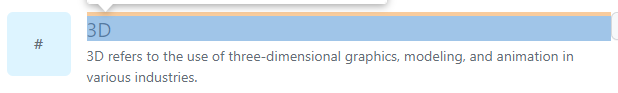
- 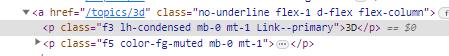
- 

In [39]:
def get_topic_title(doc):
    title_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class': title_class})
    topic_title = []
    for tag in topic_title_tags:
        topic_title.append(tag.text)
    return topic_title



In [40]:
topics=get_topic_title(doc)

In [41]:
topics[:5]

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android']

In [42]:
def get_topic_desc(doc):
    desc_class = 'f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class': desc_class})
    topic_desc = []
    for tag in topic_desc_tags:
        topic_desc.append(tag.text.strip())
    return topic_desc



In [43]:
def get_topic_url(doc):
    url_class = 'no-underline flex-grow-0'
    topic_url_tags = doc.find_all('a', {'class': url_class})
    topic_url = []
    base_url = 'https://github.com'
    for tag in topic_url_tags:
        topic_url.append(base_url + tag['href'])
    return topic_url



## Scrapping the title, desc, url together

In [70]:

def scrape_topics():
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('failed to load page')

    doc = BeautifulSoup(response.text, 'html.parser')
    topic_dict = {
        'title': get_topic_title(doc),
        'description': get_topic_desc(doc),
        'url': get_topic_url(doc),
    }

    return pd.DataFrame(topic_dict)

## For each topic, we'll get the top 20 repositories in the topic from the topic page
-To Do Explanation and Steps

In [58]:
def get_topic_page(topic_url):
    # Download the page
    response = requests.get(topic_url)
    # Check successful response
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    # Parse using Beautiful soup
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    return topic_doc

In [59]:
doc=get_topic_page('https://github.com/topics/3d')

-To Do : about h1 talks that contain repo_name and 

In [47]:
def parse_star_count(stars_str):
    stars_str = stars_str.strip()
    if stars_str[-1] == 'k':
      return int(float(stars_str[:-1])*1000)
    return int(stars_str)

In [48]:
def get_rep_info(h3_tag, star_tag):
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url =  base_url + a_tags[1] ['href']
    star_count = parse_star_count(star_tag.text.strip())
    return username, repo_name, star_count , repo_url


TODO: Show an example

In [49]:
def get_topic_repo(topic_doc):
    h1_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
    repo_tag = topic_doc.find_all('h3',{ 'class' : h1_selection_class })

    star_tags = topic_doc.find_all('span' , {'class' : 'Counter js-social-count'})

    topic_repo_dict = {
    'username' : [] ,
    'repo_name' : [] ,
    'star' : [] ,
    'repo_url' : []
   }
    for i in range(len(repo_tag)):
      repo_info = get_rep_info(repo_tag[i] , star_tags[i])
      topic_repo_dict['username'].append(repo_info[0])
      topic_repo_dict['repo_name'].append(repo_info[1])
      topic_repo_dict['star'].append(repo_info[2])
      topic_repo_dict['repo_url'].append(repo_info[3])

    return pd.DataFrame(topic_repo_dict)


TODO : Show an example

In [50]:

def scrape_topic(topic_url , path):
    
    if os.path.exists(path):
        print("the filename {} already exists skipping....".format(path))
        return 
        topic_df = get_topic_repo(get_topic_page(topic_url))
        topic_df.to_csv(path , index=None)

## Putting it all together
- we have function that scrap topic list from the webpage
- we have function that scrap repo from each topic
- now ,lets bind them together

In [64]:
def scrape_topic_repos():
    print('Scraping list of topics')
    topics_df = scrape_topics()
    
    os.makedirs('data', exist_ok=True)
    for index, row in topics_df.iterrows():
        print('Scraping top repositories for "{}"'.format(row['title']))
        scrape_topic(row['url'], 'data/{}.csv'.format(row['title']))

In [67]:
scrape_topic_repos()

Scraping list of topics
Scraping top repositories for "3D"
Scraping top repositories for "Ajax"
Scraping top repositories for "Algorithm"
Scraping top repositories for "Amp"
Scraping top repositories for "Android"
Scraping top repositories for "Angular"
Scraping top repositories for "Ansible"
Scraping top repositories for "API"
Scraping top repositories for "Arduino"
Scraping top repositories for "ASP.NET"
Scraping top repositories for "Atom"
Scraping top repositories for "Awesome Lists"
Scraping top repositories for "Amazon Web Services"
Scraping top repositories for "Azure"
Scraping top repositories for "Babel"
Scraping top repositories for "Bash"
Scraping top repositories for "Bitcoin"
Scraping top repositories for "Bootstrap"
Scraping top repositories for "Bot"
Scraping top repositories for "C"
Scraping top repositories for "Chrome"
Scraping top repositories for "Chrome extension"
Scraping top repositories for "Command line interface"
Scraping top repositories for "Clojure"
Scrapin

## References and Future Work

Summary of what we did

- ?
- ?


References to links you found useful

- ?
- ?
 
Ideas for future work

- ?
- ?